In [ ]:
!pip install ultralytics

In [2]:
# Importing essential libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from IPython.display import Video
import ultralytics
from ultralytics import YOLO
sns.set_style('darkgrid')
import pathlib # library used for working with files and directories and help in navigating and interacting with file system. Is more modern, flexible and object-oriented for path manipulation.
import glob # library used for pattern matching in filenames, specifically to retrive files and directories based on wild card patterns.
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Computer vision is a field of artificial intelligence that focuses on teaching computers to interpret and understand visual information**

*Unlike traditional methods that rely on complex pipelines and multiple passes, YOLO takes a different approach by treating object detection as a single regression problem.*

In [3]:
# Configure for visual appearance of seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

Dataset

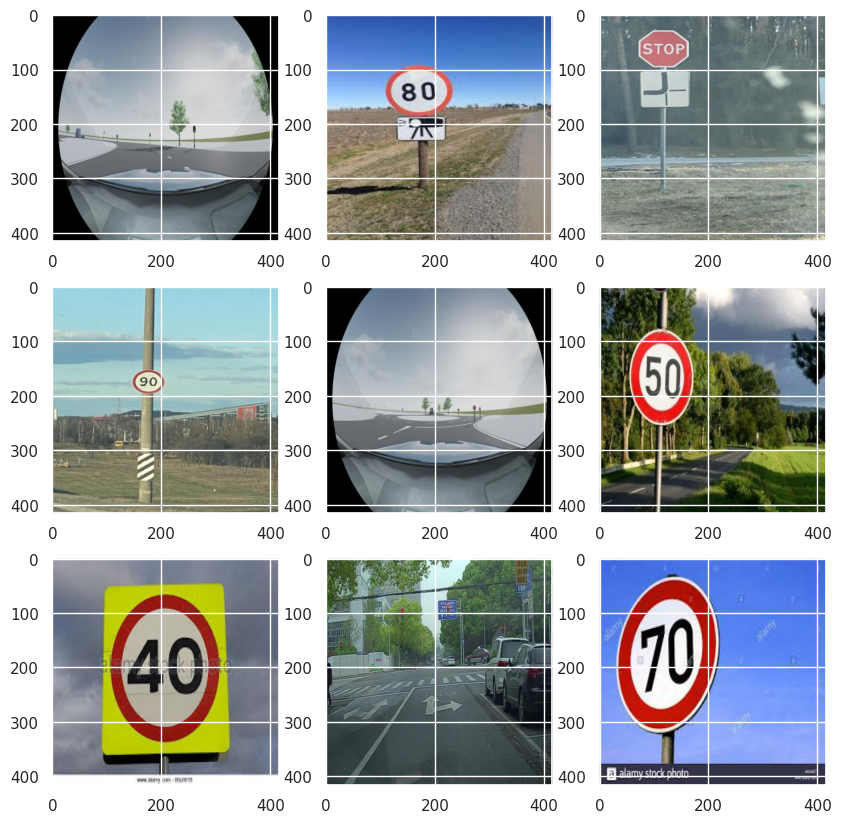

In [4]:
# Displaying some images from Trainset

Image_dir = '/content/drive/MyDrive/ Traffic Signal Detection Dataset/car/train/images'

num_images = 9
image_files = os.listdir(Image_dir)

# Randomly select num_images from dataset
random_images = random.sample(image_files, num_images)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img = Image.open(os.path.join(Image_dir, random_images[i]))
    ax.imshow(img)

In [5]:
# Get image size

img = cv2.imread("/content/drive/MyDrive/ Traffic Signal Detection Dataset/car/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg")
img.shape

(416, 416, 3)

100%|██████████| 6.25M/6.25M [00:00<00:00, 61.4MB/s]



image 1/1 /content/drive/MyDrive/ Traffic Signal Detection Dataset/car/train/images/000068_jpg.rf.7bddf623ac87edb710c0ca26c342e44f.jpg: 640x640 (no detections), 400.9ms
Speed: 18.3ms preprocess, 400.9ms inference, 13.9ms postprocess per image at shape (1, 3, 640, 640)


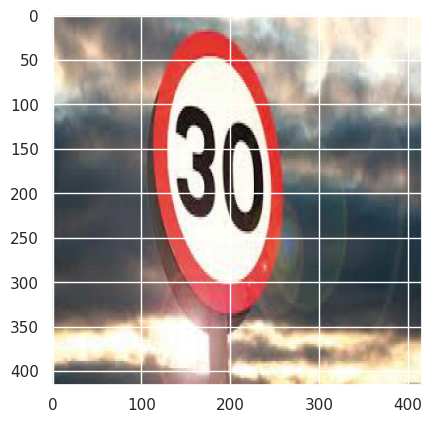

In [6]:
# Trying pre-trained YoLoV8 for detecting traffic signs
# Using a pretrained YoLoV8n model
model = YOLO('yolov8n.pt')

# Using the model to detect object
image = '/content/drive/MyDrive/ Traffic Signal Detection Dataset/car/train/images/000068_jpg.rf.7bddf623ac87edb710c0ca26c342e44f.jpg'

prediction = model.predict(source = image, imgsz = 640, conf = 0.5)

# Show results
plot = prediction[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
plt.imshow(plot)

**Training Step**

In [ ]:
!pip install --upgrade ultralytics ray

In [ ]:
final_model = YOLO('yolov8n.pt')

# Training the fianl_model
results = final_model.train(data = '/content/drive/MyDrive/ Traffic Signal Detection Dataset/car/data.yaml', epochs = 30, batch = -1 , optimizer = 'auto')


Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/ Traffic Signal Detection Dataset/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

100%|██████████| 755k/755k [00:00<00:00, 11.8MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/ Traffic Signal Detection Dataset/car/train/labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/ Traffic Signal Detection Dataset/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]

Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G     0.8668      3.546      1.202         34        640:  87%|████████▋ | 192/221 [44:24<06:40, 13.81s/it]

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):
    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)

        # Check if the image file exists before reading it
        if not os.path.exists(image_path):
            print(f"Error: Image file not found: {image_path}")
            continue  # Skip to the next image

        img = cv2.imread(image_path)

        # Check if the image was loaded successfully
        if img is None:
            print(f"Error: Could not read image: {image_path}")
            continue  # Skip to the next image

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10), dpi = 120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display

image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images

post_training_files_path = '/content/runs/detect/train2'

# Display the images
display_images(post_training_files_path, image_files)

In [ ]:
import pandas as pd
import os

# List the directories within 'runs/detect' to find the correct training directory.
training_directories = [f for f in os.listdir('runs/detect') if f.startswith('train')]

# Select the most recent training directory (usually the one with the highest number).
latest_training_directory = sorted(training_directories)[-1]

# Construct the full path to the 'results.csv' file.
results_file_path = os.path.join('runs/detect', latest_training_directory, 'results.csv')

# Read the 'results.csv' file into a pandas DataFrame.
Result_Final_model = pd.read_csv(results_file_path)

Result_Final_model.tail(10)

In [ ]:
# Reading the results.csv file as a pandas dataFrame

Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Creating subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plotting the columns using seaborn

sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0, 0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0, 1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1, 0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1, 1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2, 0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2, 1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3, 0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3, 1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4, 0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4, 1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle("Training Metrics and Loss", fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

**Validation of the model by Testset**

In [ ]:
# Loading the best performing model
ValidModel = YOLO('/content/runs/detect/train2/weights/best.pt')

# Evaluating the model on the ValidSet
metrics = ValidModel.val(split = 'val')

# Final Results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

**Making predictions on Test Images**

In [ ]:
# Normalization function
def normalize_image(image):
    return image/255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to Validaion images
path = '/content/drive/MyDrive/ Traffic Signal Detection Dataset/car'

# Place path here
valid_images_path = os.path.join(path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
  # Select 9 images at equal intervals
  num_images = len(image_files)
  step_size = max(1, num_images // 9)
  # Ensure the interval is at least 1
  selected_images = [image_files[i] for i in range(0, num_images, step_size)]

  # Prepare subplots
  fig, axes = plt.subplots(3, 3, figsize=(20, 21))

  fig.suptitle('Validation Set Inferences', fontsize = 50)

  for i, ax in enumerate(axes.flatten()):
      if i < len(selected_images):
          image_path = os.path.join(valid_images_path, selected_images[i])
          # Load Image
          image = cv2.imread(image_path)
          # Check if the image is loaded correctly
          if image is not None:
              # Resize image
              resized_image = resize_image(image, size=(640, 640))
              # Normalize image
              normalized_image = normalize_image(resized_image)
              # Convert  the normalized image to uint8 data type
              normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
              # Predict with the model
              results = ValidModel.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
              # Plot the image with labels
              annotated_image = results[0].plot(line_width=1)
              annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
              # Display the image
              ax.imshow(annotated_image_rgb)
              ax.axis('off')
          else:
              print(f'Failed to load image {image_path}')
  plt.tight_layout()
  plt.show()
else:
  print("No images found in the directory.")




In [ ]:
# Convert mp4
!ffmpeg -y -loglevel panic -i /kaggle/input/cardetection/video.mp4 output.mp4## <b>6 <span style='color:#e61227'>|</span> Export The Final Model Of Detect Traffic Signs </b>

**Tip:** The ultimate goal of training a model is to deploy it for real-world applications. Export mode in Ultralytics YOLOv8 offers a versatile range of options for exporting your trained model to different formats, making it deployable across various platforms and devices.

# Display the video
Video("output.mp4", width=960)

In [ ]:
# Use the model to detect signs
ValidModel.predict(source="/content/drive/MyDrive/ Traffic Signal Detection Dataset/video.mp4", show=True,save = True)

In [ ]:
# ipython-input-2-2db2d7324de6

# Import necessary libraries
from ultralytics import YOLO

# Loading the best performing model
ValidModel = YOLO('/content/runs/detect/train2/weights/best.pt')

# Use the model to detect signs
ValidModel.predict(source="/content/drive/MyDrive/ Traffic Signal Detection Dataset/video.mp4", show=True, save=True)

In [ ]:
# Import necessary libraries
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow  # Specifically for Google Colab

# Load the best performing model
ValidModel = YOLO('/content/runs/detect/train2/weights/best.pt')

# Run predictions on the video and save the results
results = ValidModel.predict(source="/content/drive/MyDrive/ Traffic Signal Detection Dataset/video.mp4", save=True)

# Open the processed video and display frames
cap = cv2.VideoCapture("/content/runs/detect/predict/video.mp4")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Show the frame (specific to Google Colab)
    cv2_imshow(frame)

cap.release()
cv2.destroyAllWindows()
